<a href="https://colab.research.google.com/github/m-aliabbas/Pneumonia-Train-Models-/blob/master/AGradientBoosting18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading and Preprocessing Data

In [2]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls '/content/drive/My Drive/PreTrainModels/'

dataset123.csv	datasetRes34.csv


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset



In [5]:
dataset = pd.read_csv('/content/drive/My Drive/PreTrainModels/dataset123.csv')
dataset.shape

(3680, 513)

#Split into Train , Validation and Test Sets

In [0]:
from sklearn.model_selection import train_test_split
dftrain,dftest= train_test_split(dataset, test_size=0.1, random_state=42)

In [0]:
dftrain,dfvalid= train_test_split(dftrain, test_size=0.2, random_state=42)

Getting Features Name

In [0]:
featureCol=[]
for i in range(512):
    featureCol+=[str(i)]

In [9]:
dftrain.shape,dfvalid.shape,dftest.shape

((2649, 513), (663, 513), (368, 513))

Ploting Historgram of Data in sets

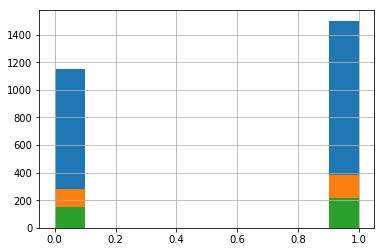

In [10]:
dftrain['label'].hist()

dfvalid['label'].hist()
dftest['label'].hist()

In [0]:
featureCol+=['label']

In [0]:
testCol=featureCol[:512]

In [13]:
len(testCol)

512

Initalization of sets according to LightGB . it is optional

In [0]:
import lightgbm as lgb
import gc
gc.collect()

dtrain = lgb.Dataset(dftrain[featureCol[:512]].values, label=dftrain['label'].values,
                      feature_name=featureCol[:512]
                      )
dvalid = lgb.Dataset(dfvalid[featureCol[:512]].values, label=dftest['label'].values,
                      feature_name=featureCol[:512],
                      )

Initial Paramets

#Random Search for Hyperparamters Tuning

Some Parameters are initalization as a population. On which we performs Random Search / Grid Search to Choose Optimal Hyperparameters

In [0]:
# gridParams = {
#     'learning_rate': [0.13,0.4,0.3,0.35,0.1,0.23,0.2,0.15],
#     'n_estimators': [40,100,120,12,20,50,90,140,105],
#     'num_leaves': [100,200,300,40,60,50,350,400],
#     'boosting_type' : ['gbdt'],
#     'objective' : ['binary'],
#     'random_state' : [501], # Updated from 'seed'
#     'colsample_bytree' : [0.65,0.9,0.7,0.85, 0.66,0.7,0.9],
    
    
#     }

In [0]:
# mdl = lgb.LGBMClassifier(
                        
#                         )

In [0]:
# mdl.get_params().keys()

Random Search with 100 Iteration , it takes very large time so I am commiting the code beacause we get optimal values which are below

In [0]:
from sklearn.metrics import f1_score
def evaluate_macroF1_lgb(truth, predictions):  
    f1 = f1_score(truth, np.round(predictions), average='binary')
    return ('macroF1', f1, True) 

In [0]:
# from sklearn.metrics import (roc_curve, auc, accuracy_score)
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# gs = RandomizedSearchCV(
#     estimator=mdl, param_distributions=gridParams, 
#     n_iter=100,
#     scoring='f1_macro',
#     cv=2,
#     n_jobs=1,
#     refit=True,
#     random_state=314,
#     verbose=True)

In [0]:
evals={}
fit_params={"early_stopping_rounds":50, 
            "eval_metric" : evaluate_macroF1_lgb, 
            "eval_set" : [dfvalid],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [0]:
# gs.fit(dftrain[testCol], dftrain['label'])

#Train Model WIth Best Parameters Optimized by Random Search

In [0]:
# print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [0]:
# bestParams=gs.best_params_

In [0]:
# bestParams={'random_state': 501, 'objective': 'binary', 'num_leaves': 100, 'n_estimators': 120, 'learning_rate': 0.1, 'colsample_bytree': 0.85, 'boosting_type': 'gbdt'}

In [0]:
params={'random_state': 1234, 'objective': 'binary', 'num_leaves': 40, 'n_estimators': 70, 'learning_rate': 0.08, 'colsample_bytree': 0.6, 'boosting_type': 'gbdt'}

In [0]:

params['min_data'] = 60
params['max_depth'] = 40
params['min_child_samples']= 50,  
params['max_bin']=60,  
params['min_child_weight']=0.2,
params['feature_fraction']= 0.4,
params['bagging_fraction']= 0.25,
params['bagging_freq']= 3,
params['min_split_gain']=0.1,

In [0]:

fit_params={"early_stopping_rounds":10000, 
#              "evals_result":evals_result,
            "eval_metric" : evaluate_macroF1_lgb, 
            
            "eval_set" : (dfvalid[testCol],dfvalid['label']),
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 1,
            'categorical_feature': 'auto'}

In [0]:
mdl = lgb.LGBMClassifier(**params)

In [54]:

mdl.fit(dftrain[testCol],dftrain['label'],**fit_params)

[1]	valid's binary_logloss: 0.619804	valid's macroF1: 0.7311
Training until validation scores don't improve for 10000 rounds.
[2]	valid's binary_logloss: 0.567854	valid's macroF1: 0.911271
[3]	valid's binary_logloss: 0.521886	valid's macroF1: 0.948298
[4]	valid's binary_logloss: 0.481015	valid's macroF1: 0.951777
[5]	valid's binary_logloss: 0.44634	valid's macroF1: 0.953368
[6]	valid's binary_logloss: 0.41537	valid's macroF1: 0.953368
[7]	valid's binary_logloss: 0.389038	valid's macroF1: 0.953247
[8]	valid's binary_logloss: 0.365893	valid's macroF1: 0.95201
[9]	valid's binary_logloss: 0.345308	valid's macroF1: 0.952135
[10]	valid's binary_logloss: 0.325661	valid's macroF1: 0.950777
[11]	valid's binary_logloss: 0.308162	valid's macroF1: 0.949416
[12]	valid's binary_logloss: 0.292653	valid's macroF1: 0.949416
[13]	valid's binary_logloss: 0.278473	valid's macroF1: 0.949416
[14]	valid's binary_logloss: 0.266012	valid's macroF1: 0.951886
[15]	valid's binary_logloss: 0.254741	valid's macroF1

LGBMClassifier(bagging_fraction=(0.25,), bagging_freq=(3,),
               boosting_type='gbdt', class_weight=None, colsample_bytree=0.6,
               feature_fraction=(0.4,), importance_type='split',
               learning_rate=0.08, max_bin=(60,), max_depth=40,
               min_child_samples=(50,), min_child_weight=(0.2,), min_data=60,
               min_split_gain=(0.1,), n_estimators=70, n_jobs=-1, num_leaves=40,
               objective='binary', random_state=1234, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
lab=dftest['label']

In [0]:
dftest1=dftest.drop('label',axis=1)

In [0]:

y_pred=mdl.predict(dftest1)

In [58]:
y_pred

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,

In [0]:
for i in range(len(y_pred)):
    if y_pred[i]>=.6:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [60]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(lab, y_pred)
#Accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,lab)
print(accuracy)
print(cm)

0.9592391304347826
[[145   6]
 [  9 208]]


Calculating Values according to
$$ Recall = \frac{TruePositive}{TruePositive+False Nagitive}=0.9705215419501134
$$ Precision = \frac{TruePositive}{TruePositive+FalsePositive}$$
$$F1 = \frac{2 \cdot precision\cdot recall}{precision+ recall}$$

In [61]:
conf=cm
TrueNagitive=conf[0][0]
FalseNegative=conf[0][1]
TruePositive=conf[1][1]
FalsePositive=conf[1][0]
recal=TruePositive/(TruePositive+FalseNegative)
precision=TruePositive/(TruePositive+FalsePositive)
print("Precision of Model =",precision,"Recall of Model ", recal)
f1=2*((precision*recal)/(precision+recal))
print('F1 Score of Model =',f1)

Precision of Model = 0.9585253456221198 Recall of Model  0.9719626168224299
F1 Score of Model = 0.9651972157772621


Learning Curves

In [66]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean,
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 
             label="Validation")

    plt.legend(loc="best")
    return plt






Automatically created module for IPython interactive environment


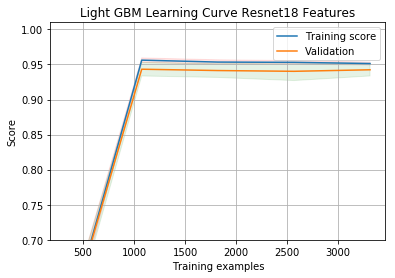

In [67]:

title = "Light GBM Learning Curve Resnet18 Features"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
plot_learning_curve(mdl, title, dataset[testCol],dataset['label'], ylim=(0.7, 1.01), cv=cv, n_jobs=4)
plt.show()